In [276]:
import pandas as pd
#pd.options.display.max_columns = None
import numpy as np 
import matplotlib.pyplot as plt 
#import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [277]:
df = pd.read_csv('FIFA_18.csv', encoding='cp1252')
df.head()

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,$565,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,$405,...,85,95,28,31,23,7,11,15,14,11
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,$290,...,81,94,27,24,33,9,9,15,15,11
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,$260,...,40,68,15,21,13,90,85,87,88,94
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,$355,...,79,88,68,58,51,15,13,5,10,13


In [278]:
features_to_cluster = ['Age', 'Potential', 'Finishing', 'Reactions', 'Dribbling', 'BallControl', 'LongShots', 'Volleys', 'Vision']

In [279]:
cluster_df = df.loc[:,features_to_cluster]
scaler = StandardScaler()
cluster_df_std = scaler.fit_transform(cluster_df)
#cluster_df_std['Name'] = df['Name']
#cluster_df_std.head()
cluster_df_std.shape

(501, 9)

In [280]:
cluster_df_std = pd.DataFrame(data=cluster_df_std, columns=features_to_cluster)

In [281]:
cluster_df_std['Name'] = df['Name']
cluster_df_std.head()

,Age,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision,Name
0,1.049136,2.848972,1.511092,3.427809,1.218807,1.137419,1.370243,1.212505,1.694932,L. Messi
1,1.601255,2.848972,1.468458,3.667159,0.810879,1.035011,1.326481,1.256946,0.803736,Cristiano Ronaldo
2,-0.331161,2.538884,1.170018,3.188460,1.173482,1.086215,0.845101,1.123623,1.175068,Neymar Jr
3,-0.055102,2.538884,-1.984920,2.231062,-2.361891,-1.627585,-2.218227,-2.031693,-0.235992,De Gea
4,-0.055102,2.228796,0.956846,2.470411,0.720229,0.881400,1.238958,1.034741,1.694932,K. De Bruyne


In [282]:
k=5
chosen_feature1, chosen_feature2 = 'Finishing', 'Volleys'
kmeans = KMeans(n_clusters=k, random_state=0)
y_pred = kmeans.fit_predict(cluster_df_std.loc[:,[chosen_feature1, chosen_feature2]])

In [283]:
kmeans.cluster_centers_

array([[ 0.95745535,  0.95347704],
       [-1.95474796, -1.95375041],
       [ 0.49374966,  0.47294427],
       [-0.89933629, -0.92530952],
       [-0.21813452, -0.15564513]])

In [284]:
df_chosen = cluster_df_std[[chosen_feature1, chosen_feature2, 'Name']]
df_chosen.head()

,Finishing,Volleys,Name
0,1.511092,1.212505,L. Messi
1,1.468458,1.256946,Cristiano Ronaldo
2,1.170018,1.123623,Neymar Jr
3,-1.984920,-2.031693,De Gea
4,0.956846,1.034741,K. De Bruyne


## K-Means

In [303]:
def plot_data(df_chosen):
    plt.plot(df_chosen.loc[:,chosen_feature1], df_chosen.loc[:,chosen_feature2], 'k.', markersize=10)

def plot_centroids(centroids, circle_color='seagreen', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.5)
    #plt.scatter(centroids[:, 0], centroids[:, 1], s=50, linewidths=50,
     #           color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, df_chosen, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, player=None):
    mins = df_chosen[[chosen_feature1, chosen_feature2]].min(axis=0) - 0.1
    maxs = df_chosen[[chosen_feature1, chosen_feature2]].max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="viridis", alpha=0.7)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    
    plot_data(df_chosen)


    if player:
        plt.scatter(df_chosen.loc[df_chosen['Name'] == player, chosen_feature1], df_chosen.loc[df_chosen['Name'] == player, chosen_feature2], color='red', s=700, marker='*', edgecolors='red', linewidths=3)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel(f"{chosen_feature1}", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel(f"{chosen_feature2}", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

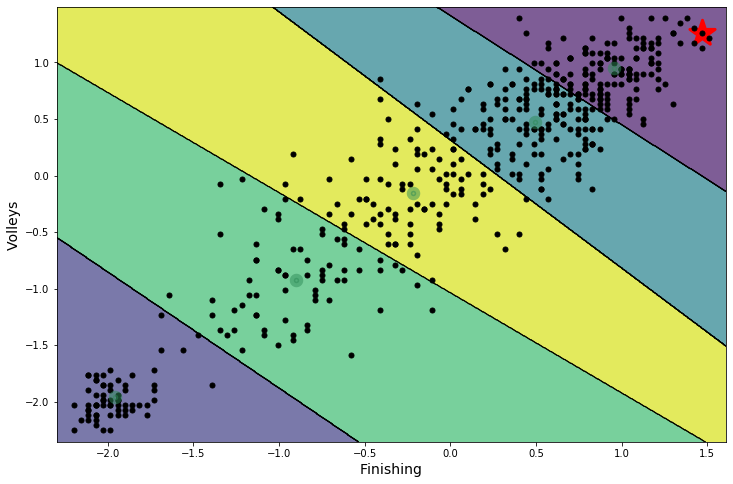

In [304]:
plt.figure(figsize=(12, 8))
plot_decision_boundaries(kmeans, cluster_df_std, player='Cristiano Ronaldo')
plt.show()

## K-Means Silhouette Score

In [287]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=0).fit(df_chosen.drop('Name', axis=1)) for k in range(2,10)]

silhouette_scores = [silhouette_score(df_chosen.drop('Name', axis=1), model.labels_) for model in kmeans_per_k]

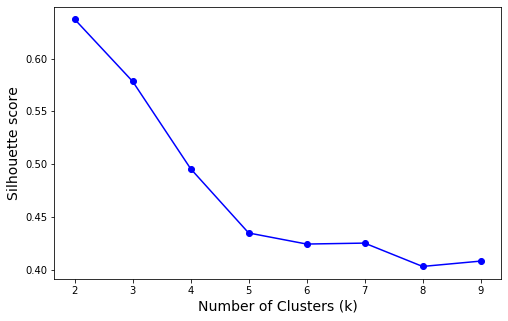

In [288]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("Number of Clusters (k)", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [289]:
cluster_df_std['cluster'] = kmeans.labels_

In [290]:
cluster_df_std.head()

,Age,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision,Name,cluster
0,1.049136,2.848972,1.511092,3.427809,1.218807,1.137419,1.370243,1.212505,1.694932,L. Messi,0
1,1.601255,2.848972,1.468458,3.667159,0.810879,1.035011,1.326481,1.256946,0.803736,Cristiano Ronaldo,0
2,-0.331161,2.538884,1.170018,3.188460,1.173482,1.086215,0.845101,1.123623,1.175068,Neymar Jr,0
3,-0.055102,2.538884,-1.984920,2.231062,-2.361891,-1.627585,-2.218227,-2.031693,-0.235992,De Gea,1
4,-0.055102,2.228796,0.956846,2.470411,0.720229,0.881400,1.238958,1.034741,1.694932,K. De Bruyne,0


## Filter dataframe to selected cluster

In [291]:
chosen_player_cluster = cluster_df_std.loc[cluster_df_std['Name'] == 'L. Messi']['cluster']
chosen_player_set = cluster_df_std.loc[cluster_df_std['cluster'] == chosen_player_cluster[0]]

In [292]:
chosen_player_set

,Age,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision,Name,cluster
0,1.049136,2.848972,1.511092,3.427809,1.218807,1.137419,1.370243,1.212505,1.694932,L. Messi,0
1,1.601255,2.848972,1.468458,3.667159,0.810879,1.035011,1.326481,1.256946,0.803736,Cristiano Ronaldo,0
2,-0.331161,2.538884,1.170018,3.188460,1.173482,1.086215,0.845101,1.123623,1.175068,Neymar Jr,0
4,-0.055102,2.228796,0.956846,2.470411,0.720229,0.881400,1.238958,1.034741,1.694932,K. De Bruyne,0
5,-0.055102,1.918708,1.042115,2.231062,1.128156,1.035011,0.757578,0.945859,1.323600,E. Hazard,0
...,...,...,...,...,...,...,...,...,...,...,...
479,-0.055102,-1.182172,0.786309,-0.401782,0.674904,0.471770,0.101150,0.723653,0.135340,L. Muriel,0
480,-0.331161,-0.872084,0.871578,-0.880481,0.493602,0.318158,0.538768,0.990300,0.729470,V. Aboubakar,0
485,0.220958,-1.492259,0.914212,0.316266,0.266976,0.318158,0.319959,1.034741,0.061073,Sergi Enrich,0
489,0.220958,-1.492259,0.871578,0.076917,0.493602,0.471770,1.063910,0.634771,0.209606,D. Didavi,0


## Guassian Mixture

In [293]:
gm = GaussianMixture(n_components=4, n_init=10, random_state=0)
gm.fit(df_chosen.drop('Name', axis=1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=10,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [299]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, df_chosen, resolution=1000, show_ylabels=True, player=None):
    mins = df_chosen.drop('Name', axis=1).min(axis=0) - 0.1
    maxs = df_chosen.drop('Name', axis=1).max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12), cmap='viridis')
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(df_chosen.loc[:, chosen_feature1], df_chosen.loc[:, chosen_feature2], 'k.', markersize=10)
    #plot_centroids(clusterer.means_, clusterer.weights_)
    if player:
        plt.scatter(df_chosen.loc[df_chosen['Name'] == player, chosen_feature1], df_chosen.loc[df_chosen['Name'] == player, chosen_feature2], color='red', s=700, marker='*', edgecolors='red', linewidths=3)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

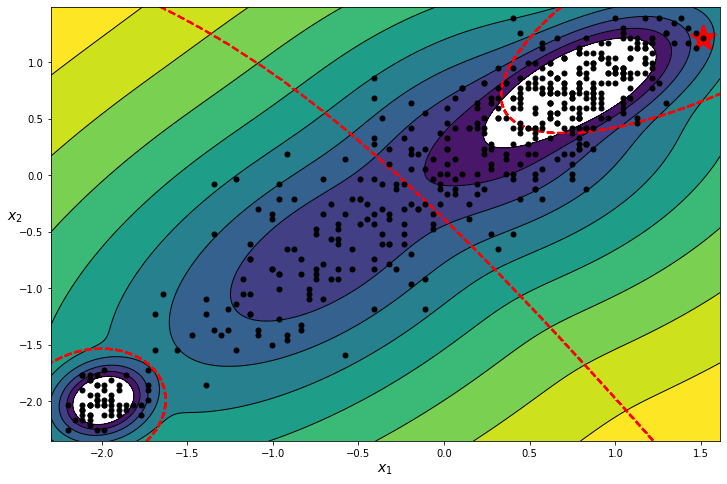

In [300]:
plt.figure(figsize=(12, 8))

plot_gaussian_mixture(gm, df_chosen, player='L. Messi')

plt.show()

## Guassian Mixture - BIC/AIC

In [296]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=0).fit(df_chosen.drop('Name', axis=1))
             for k in range(2, 10)]

In [297]:
bics = [model.bic(df_chosen.drop('Name', axis=1)) for model in gms_per_k]
aics = [model.aic(df_chosen.drop('Name', axis=1)) for model in gms_per_k]

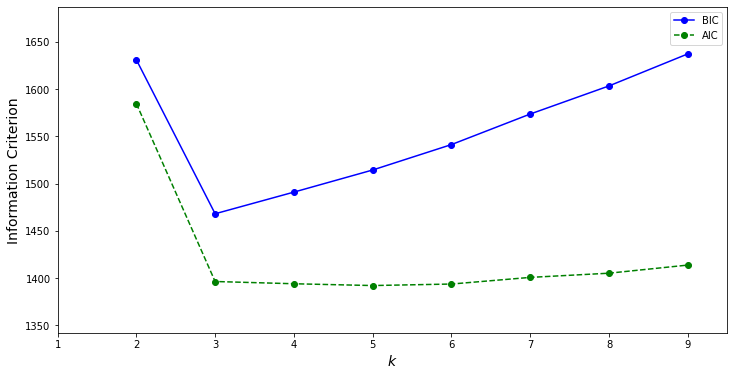

In [298]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), bics, "bo-", label="BIC")
plt.plot(range(2, 10), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(bics) + 50])
plt.legend()
plt.show()